In [3]:
from skimage import measure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import sklearn
import sklearn.cluster
import itertools
import statistics
import cv2
import scipy
from scipy import signal


In [4]:
shape = cv2.imread("./shape-train/circle/circle-10.jpg")
print(shape.shape)

(224, 224, 3)


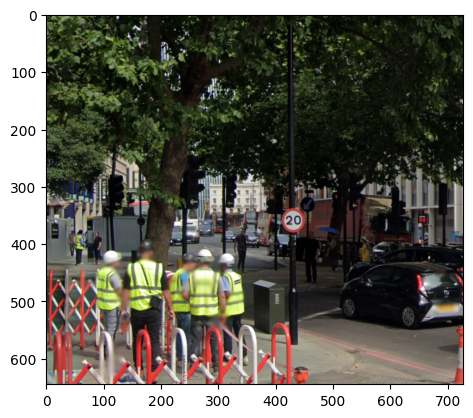

In [5]:
img_bgr = cv2.imread("./img/IMG_0108.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


plt.imshow(img_rgb)
plt.show()

In [6]:
def edge_detection(img_bgr):
    img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    # Apply the Sobel filters for horizontal and vertical edge detection
    sobel_x = cv2.Sobel(img[:,:,1], cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edge detection
    sobel_y = cv2.Sobel(img[:,:,1], cv2.CV_64F, 0, 1, ksize=3)  # Vertical edge detection

    # Calculate the magnitude of the gradient
    edge_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    # Normalize the result to an 8-bit scale
    edge_magnitude = cv2.normalize(edge_magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Display the edge magnitude image
    return edge_magnitude

In [7]:
def binary_three(img_bgr):
    img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_red = np.array([100, 100, 100])
    upper_red = np.array([255, 255, 255])

    # Create a binary mask for the red color within the specified range
    mask = cv2.inRange(img_hsv, lower_red, upper_red)

    # Apply the mask to the original image to segment the red regions
    red_segmented = cv2.bitwise_and(img, img, mask=mask)
    _, binary_image = cv2.threshold(red_segmented, red_segmented.mean(), 255, cv2.THRESH_BINARY)
    return binary_image

In [8]:
def blur(img_bgr, kernel_size=5):
    return cv2.GaussianBlur(img_bgr, (kernel_size, kernel_size), 0)

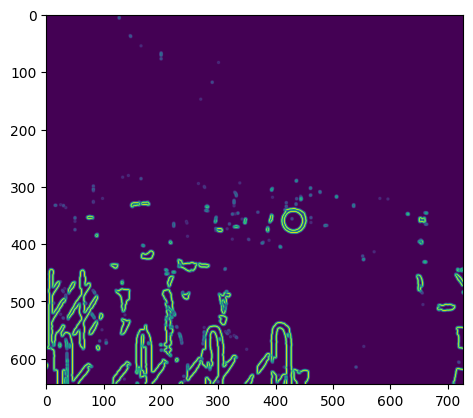

In [9]:
edged = edge_detection(blur(binary_three(img_bgr)))

plt.imshow(edged)
plt.show()

In [10]:
contours, hierachy = cv2.findContours( 
    edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [11]:
# for cont in contours:
#     print(cont, end="\n===\n")

In [12]:
# Create a copy of the image to draw the contours on
contour_image = img_rgb.copy()

# Draw the contours on the copied image
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Convert the BGR image to RGB format for display with Matplotlib
contour_image_rgb = cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB)

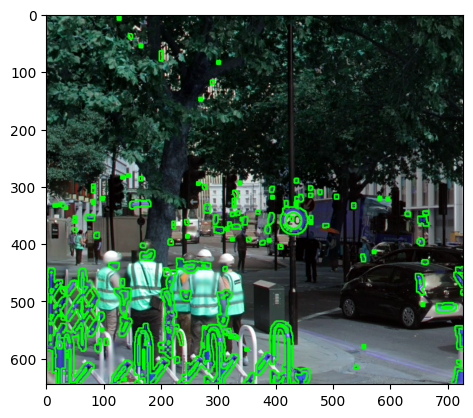

In [13]:
plt.imshow(contour_image_rgb)
plt.show()

In [14]:
print(len(contours))

245


`https://www.geeksforgeeks.org/how-to-detect-shapes-in-images-in-python-using-opencv/`

In [15]:
"""
i = 0

# list for storing names of shapes 
for contour in contours: 

    # here we are ignoring first counter because  
    # findcontour function detects whole image as shape 
    if i == 0: 
        i = 1
        continue

    # cv2.approxPloyDP() function to approximate the shape 
    approx = cv2.approxPolyDP( 
        contour, 0.01 * cv2.arcLength(contour, True), True) 

    # using drawContours() function 
    cv2.drawContours(img_rgb, [contour], 0, (0, 0, 255), 5) 

    # finding center point of shape 
    M = cv2.moments(contour) 
    if M['m00'] != 0.0: 
        x = int(M['m10']/M['m00']) 
        y = int(M['m01']/M['m00']) 

    # putting shape name at center of each shape 
    if len(approx) == 3: 
        cv2.putText(img_rgb, 'Triangle', (x, y), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2) 

    elif len(approx) == 4: 
        cv2.putText(img_rgb, 'Quadrilateral', (x, y), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2) 

    elif len(approx) == 5: 
        cv2.putText(img_rgb, 'Pentagon', (x, y), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2) 

    elif len(approx) == 6: 
        cv2.putText(img_rgb, 'Hexagon', (x, y), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2) 

    else: 
        cv2.putText(img_rgb, 'circle', (x, y), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2) 

# displaying the image after drawing contours 
cv2.imshow('shapes', img_rgb)

"""

"\ni = 0\n\n# list for storing names of shapes \nfor contour in contours: \n\n    # here we are ignoring first counter because  \n    # findcontour function detects whole image as shape \n    if i == 0: \n        i = 1\n        continue\n\n    # cv2.approxPloyDP() function to approximate the shape \n    approx = cv2.approxPolyDP( \n        contour, 0.01 * cv2.arcLength(contour, True), True) \n\n    # using drawContours() function \n    cv2.drawContours(img_rgb, [contour], 0, (0, 0, 255), 5) \n\n    # finding center point of shape \n    M = cv2.moments(contour) \n    if M['m00'] != 0.0: \n        x = int(M['m10']/M['m00']) \n        y = int(M['m01']/M['m00']) \n\n    # putting shape name at center of each shape \n    if len(approx) == 3: \n        cv2.putText(img_rgb, 'Triangle', (x, y), \n                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2) \n\n    elif len(approx) == 4: \n        cv2.putText(img_rgb, 'Quadrilateral', (x, y), \n                    cv2.FONT_HERSHEY_SIM

In [16]:
def filter_c(contours, image):
    height, width = image.shape[:2]

    image_area = width * height

    n_list = []

    for cont in contours:

        if len(cont) < 6:
            continue

        ellipse = cv2.fitEllipse(cont)
        c_area = cv2.contourArea(cont)

        # Extract the major and minor axes of the fitted ellipse
        major_axis, minor_axis = ellipse[1]

        # Calculate the aspect ratio (ratio of major axis to minor axis)
        ratio = major_axis / minor_axis

        if(c_area > 6**2 and c_area > image_area*.001 and 0.5 < ratio < 2):
            n_list.append(cont)
    return n_list

In [17]:
from keras.models import load_model

shape_recognizer = load_model('shape-recognizerv2-5eh.h5')

2023-10-19 16:11:20.281264: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-19 16:11:20.467089: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-19 16:11:20.467150: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-19 16:11:20.468897: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-19 16:11:20.605486: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-19 16:11:20.607386: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [18]:
def pred_circle(img_bgr):
    # Load and preprocess the image
    img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img, axis=0)

    # Make a prediction
    prediction = shape_recognizer.predict(img)

    # Interpret the prediction
    return prediction[0][0]

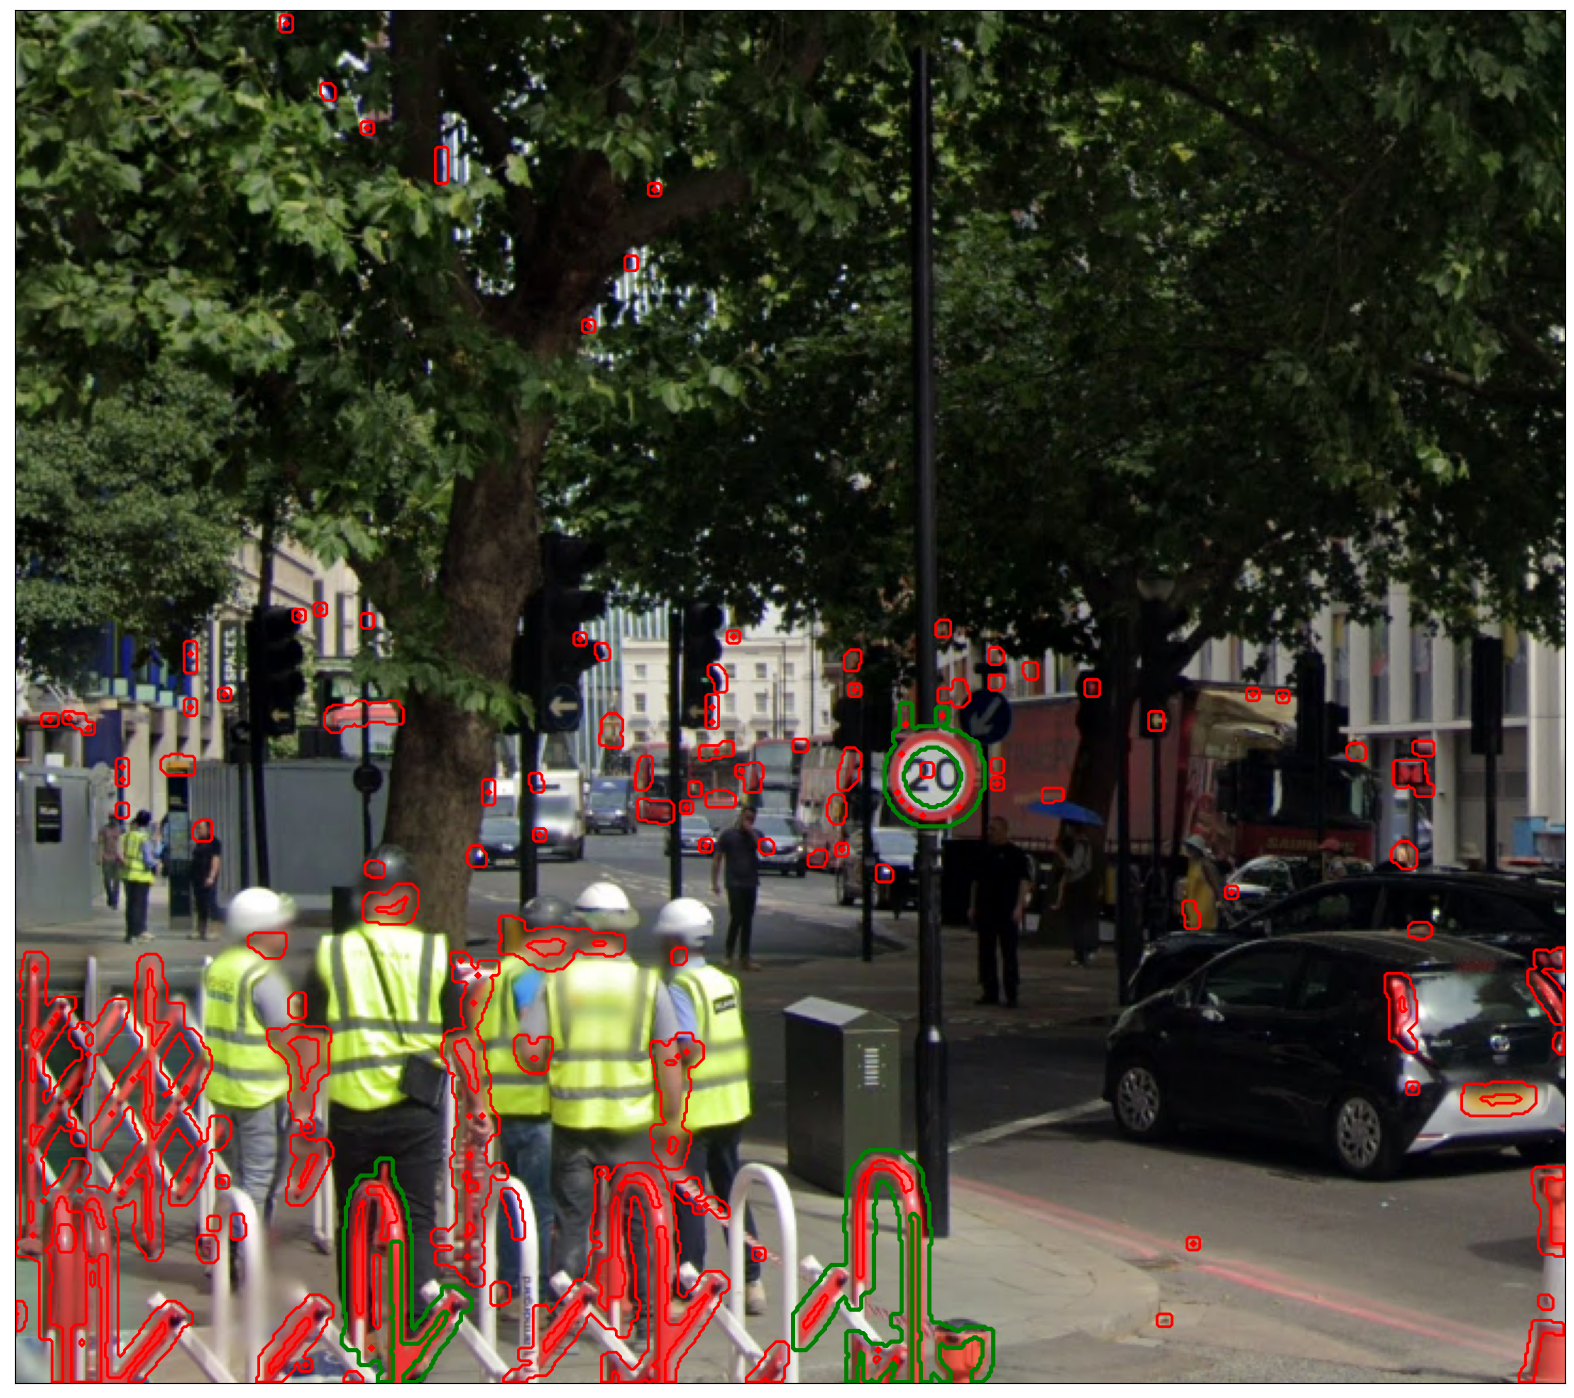

In [19]:
_, (ax1) = plt.subplots(1,figsize=(20,20))
plt.xticks([]),plt.yticks([])
ax1.imshow(img_rgb);


for cont in contours:
    ax1.add_patch(matplotlib.patches.Polygon(cont[:, 0, :], edgecolor="red", linewidth=2, fill=False))

for cont in filter_c(contours, img_rgb):
    ax1.add_patch(matplotlib.patches.Polygon(cont[:, 0, :], edgecolor="green", linewidth=3, fill=False))



plt.show()

**Look at the contours obtained**

In [20]:
def get_min_x_max_x_min_y_max_y(contour):
    min_x, min_y = float('inf'), float('inf')
    max_x, max_y = -float('inf'), -float('inf')

    # Iterate through the points in the contour
    for point in contour:
        x, y = point[0]
        min_x = min(min_x, x)
        max_x = max(max_x, x)
        min_y = min(min_y, y)
        max_y = max(max_y, y)

    return min_x, max_x, min_y, max_y

In [21]:
def predict_contour(contour):


    min_x, max_x, min_y, max_y = get_min_x_max_x_min_y_max_y(contour)

    width = max_x - min_x + 2*3
    height = max_y - min_y + 2*3

    offset_contour = contour.copy()
    for point in offset_contour:
        point[0][0] -= min_x - 3
        point[0][1] -= min_y - 3
        


    # Create a blank binary image
    new_image = np.zeros((height, width), dtype=np.uint8)


    cv2.drawContours(new_image, [offset_contour], 0, 255, thickness=2)

    pred = 100*(1 - pred_circle(new_image))

    return pred, new_image
    

In [22]:
cont_img = []
preds = []

for contour in filter_c(contours, img_rgb):
    
    pred, new_image = predict_contour(contour)

    preds.append(pred)
    cont_img.append(new_image)

1/1 [==============================] - 0s 50ms/step


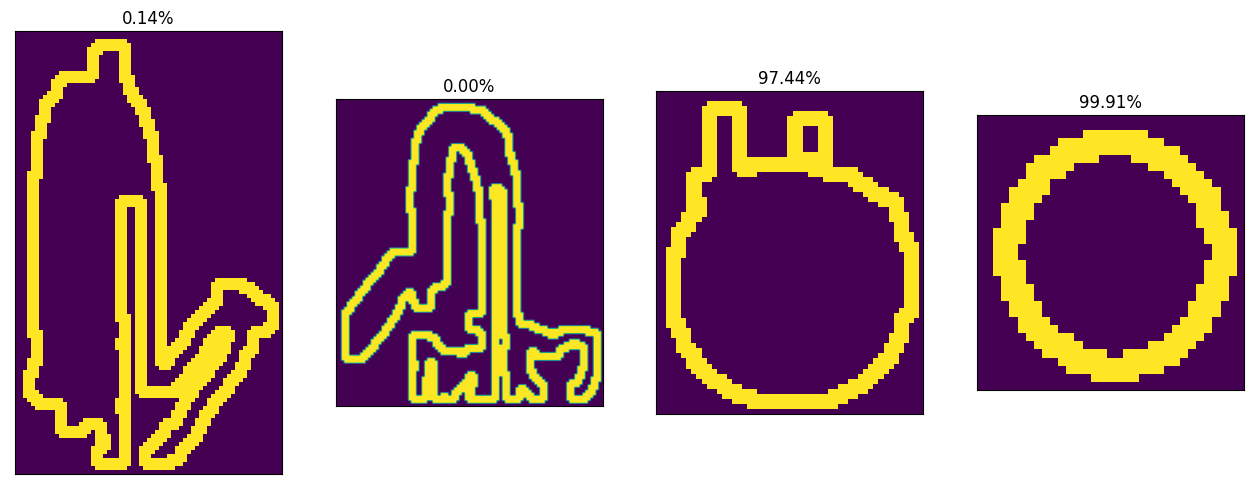

In [23]:
plt.figure(figsize=(20, 20))
for i in range(len(cont_img)):
    plt.subplot(1,len(cont_img) + 1,i+1),plt.imshow(cont_img[i])
    plt.title(f"{preds[i]:2.2f}%"), plt.xticks([]), plt.yticks([])

plt.show()

1/1 [==============================] - 0s 112ms/step


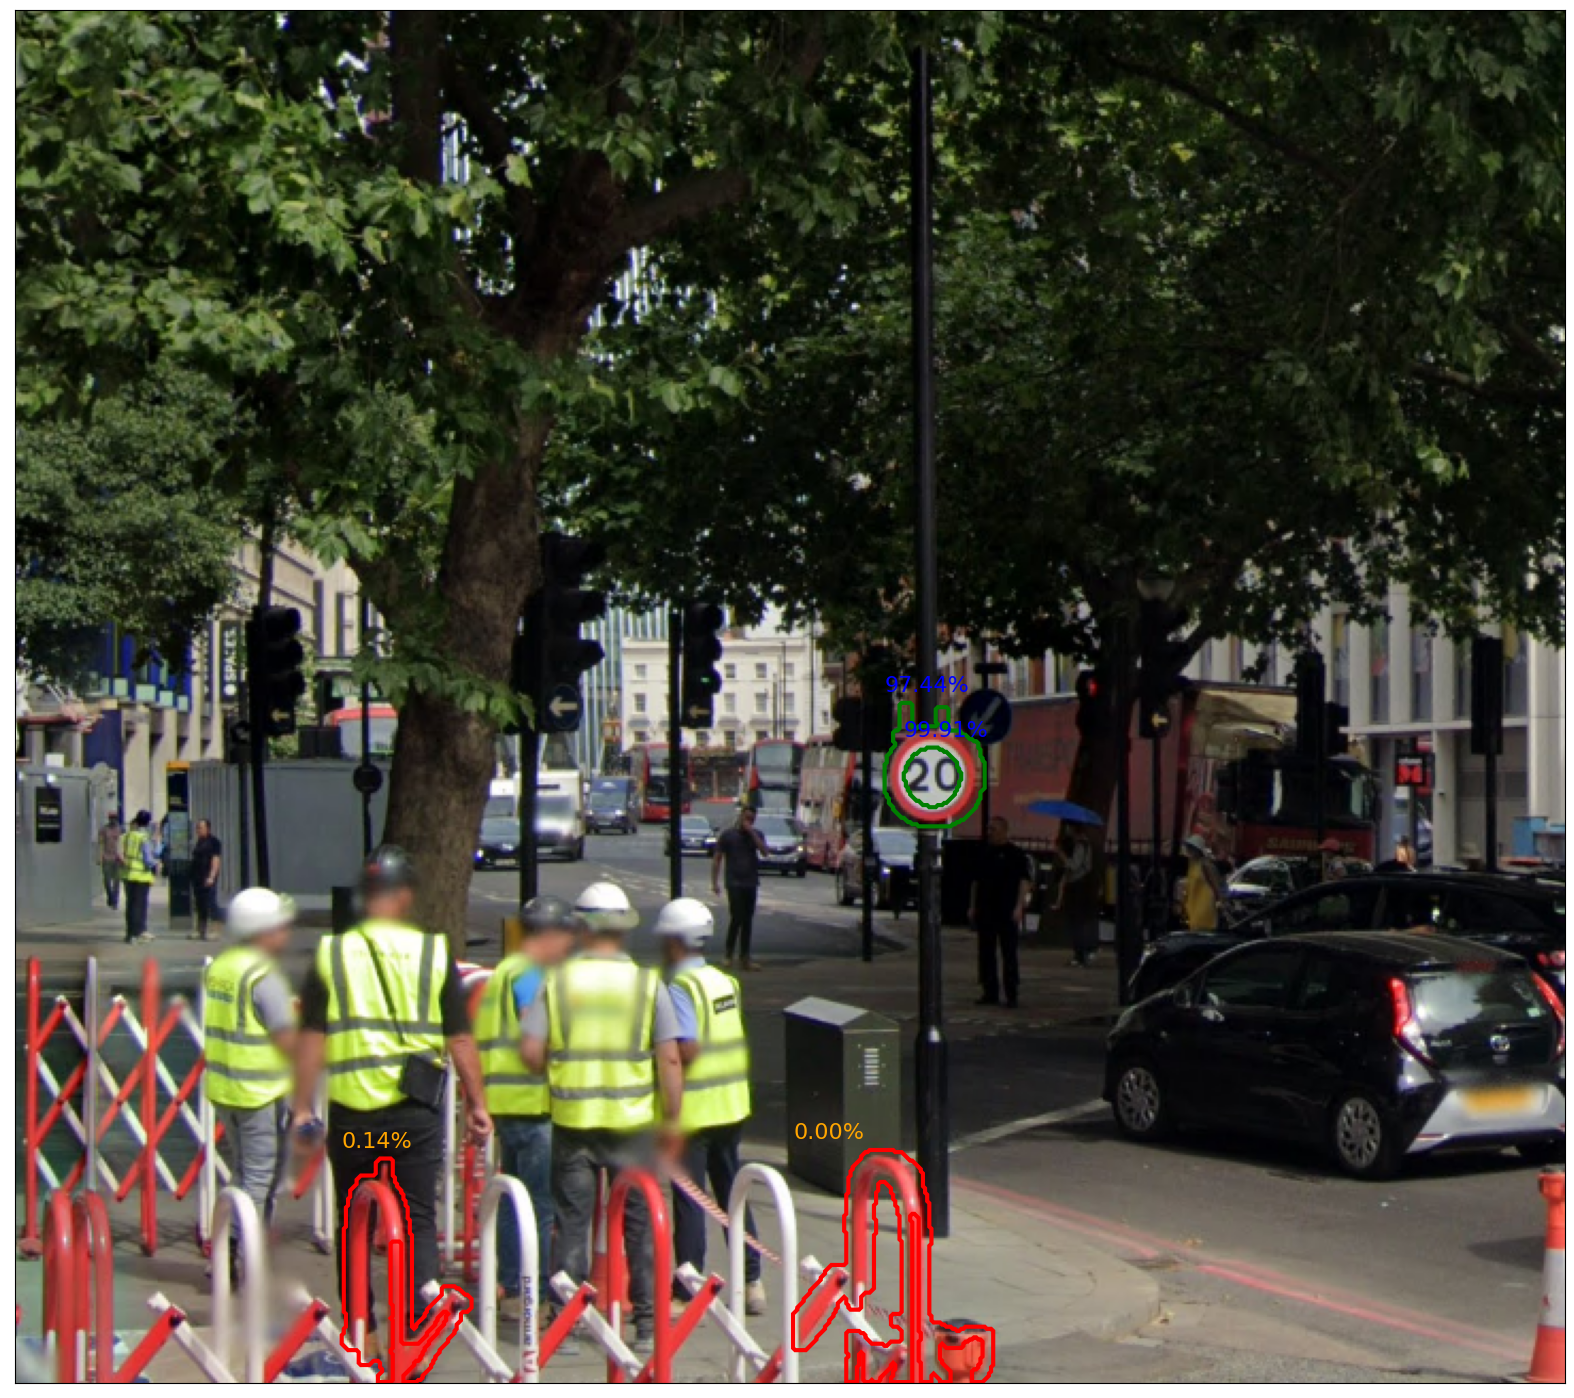

In [28]:
_, (ax1) = plt.subplots(1,figsize=(20,20))
plt.xticks([]),plt.yticks([])
ax1.imshow(img_rgb);


for cont in filter_c(contours, img_rgb):
    pred, _ = predict_contour(cont)
    x, _, y, _ = get_min_x_max_x_min_y_max_y(cont)

    if pred > .5:
        ax1.add_patch(matplotlib.patches.Polygon(cont[:, 0, :], edgecolor="green", linewidth=3, fill=False))
        ax1.annotate(f"{pred:2.2f}%", (x, y-5), size=16, color='blue')
    else :
        ax1.add_patch(matplotlib.patches.Polygon(cont[:, 0, :], edgecolor="red", linewidth=3, fill=False))
        ax1.annotate(f"{pred:2.2f}%", (x, y-5), size=16, color='orange')



plt.show()